In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,NaN,0.48,NaN,NaN,NaN
2,1.51618,13.53,3.55,1.54,NaN,NaN,NaN,NaN,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,NaN,NaN,NaN,NaN,1.06,0.0
210,1.51685,14.92,0.00,NaN,73.06,NaN,NaN,NaN,0.0
211,1.52065,14.36,0.00,NaN,NaN,0.00,NaN,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	23
float64		column 2	13
float64		column 3	0
float64		column 4	30
float64		column 5	60
float64		column 6	73
float64		column 7	80
float64		column 8	83
float64		column 9	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,191.000000,201.000000,214.000000,184.000000,154.000000,141.000000,134.000000,131.000000,204.000000
mean,1.518427,13.402736,2.684533,1.431359,72.692143,0.448298,8.760970,0.164580,0.055343
std,0.003091,0.814900,1.442408,0.485087,0.709674,0.315212,1.035568,0.473505,0.095816
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.790000,0.000000,0.000000
25%,1.516525,12.890000,2.115000,1.190000,72.345000,0.130000,8.247500,0.000000,0.000000
50%,1.517660,13.300000,3.480000,1.355000,72.850000,0.560000,8.605000,0.000000,0.000000
75%,1.519220,13.810000,3.600000,1.612500,73.100000,0.610000,9.067500,0.000000,0.092500
max,1.533930,17.380000,4.490000,3.500000,75.410000,1.760000,14.960000,2.880000,0.510000


<AxesSubplot:>

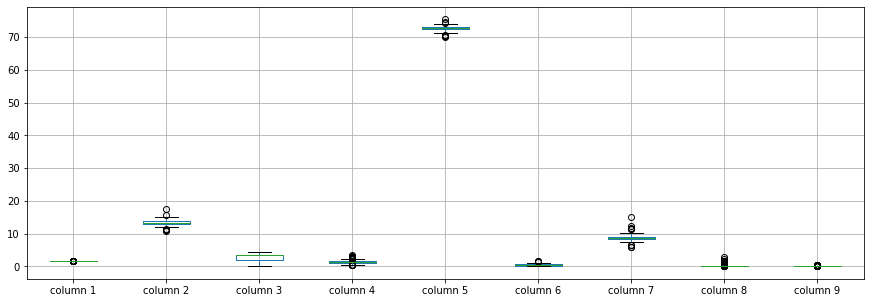

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518427
column 2    13.402736
column 3     2.684533
column 4     1.431359
column 5    72.692143
column 6     0.448298
column 7     8.760970
column 8     0.164580
column 9     0.055343
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.196186,-0.153747,-0.387425,-0.599178,-0.308259,0.741848,-0.102249,0.110857
column 2,-0.196186,1.000000,-0.273862,0.076384,-0.106806,-0.453755,-0.208167,0.473695,-0.207426
column 3,-0.153747,-0.273862,1.000000,-0.459988,-0.280969,0.373835,-0.247422,-0.630230,0.134060
column 4,-0.387425,0.076384,-0.459988,1.000000,-0.023788,0.138122,-0.270319,0.541395,-0.083709
column 5,-0.599178,-0.106806,-0.280969,-0.023788,1.000000,-0.020253,-0.151038,-0.101083,-0.105361
column 6,-0.308259,-0.453755,0.373835,0.138122,-0.020253,1.000000,-0.428793,-0.012189,0.069514
column 7,0.741848,-0.208167,-0.247422,-0.270319,-0.151038,-0.428793,1.000000,-0.234070,0.054238
column 8,-0.102249,0.473695,-0.630230,0.541395,-0.101083,-0.012189,-0.234070,1.000000,-0.123927
column 9,0.110857,-0.207426,0.134060,-0.083709,-0.105361,0.069514,0.054238,-0.123927,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54+54,9+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.18142817570613
Epoch: 1 , loss: 76.89586639404297
Epoch: 2 , loss: 76.88144537118765
Epoch: 3 , loss: 76.09818796011118
Epoch: 4 , loss: 76.83052825927734
Epoch: 5 , loss: 76.46263650747446
Epoch: 6 , loss: 76.5500746506911
Epoch: 7 , loss: 76.77371069101187
Epoch: 8 , loss: 76.82894750741812
Epoch: 9 , loss: 75.93706952608548
Epoch: 10 , loss: 76.88089047945462
Epoch: 11 , loss: 77.19506571843074
Epoch: 12 , loss: 77.07755455603966
Epoch: 13 , loss: 76.6914303119366
Epoch: 14 , loss: 76.65536117553711
Epoch: 15 , loss: 76.39293083777794
Epoch: 16 , loss: 76.03210097092848
Epoch: 17 , loss: 75.46580505371094
Epoch: 18 , loss: 74.47527195857121
Epoch: 19 , loss: 74.67490973839394
Epoch: 20 , loss: 75.26961106520433
Epoch: 21 , loss: 74.98261290330153
Epoch: 22 , loss: 74.00993141761192
Epoch: 23 , loss: 74.14077758789062
Epoch: 24 , loss: 73.87919939481296
Epoch: 25 , loss: 72.63279166588417
Epoch: 26

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5     0.481282
column 6     0.128764
column 7     0.298227
column 8     0.019857
column 9     0.000000
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,-71.873963,0.000000,-7.382954,0.021217,0.036214
2,0.0,0.0,0.0,0.000000,-72.223374,-0.245653,-7.356023,0.021214,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,-2.488385,-70.866267,0.110519,-8.358263,0.000000,0.000000
210,0.0,0.0,0.0,-1.563315,0.000000,0.207089,-7.445449,-1.561131,0.000000
211,0.0,0.0,0.0,-1.929688,-73.107244,0.000000,-8.277396,-1.630977,0.000000
212,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(564.033672803132, 1090.4359815890969)

In [29]:
NRMS=numerator/denominator
NRMS


0.5172551918005892

In [30]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,1.51761,13.89,3.60,1.360000,0.856037,0.480000,0.447046,0.021217,0.036214
2,1.51618,13.53,3.55,1.540000,0.766626,0.144347,0.423977,0.021214,0.000000
3,1.51766,13.21,3.69,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,1.51742,13.27,3.62,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,0.391615,1.743733,0.190519,0.821737,1.060000,0.000000
210,1.51685,14.92,0.00,0.426685,73.060000,0.207089,0.954551,0.028869,0.000000
211,1.52065,14.36,0.00,0.090312,0.312756,0.000000,0.162604,0.009023,0.000000
212,1.51651,14.38,0.00,1.940000,73.610000,0.000000,8.480000,1.570000,0.000000


In [20]:
imputations[-1].to_excel("Glass_AW_20(imp).xlsx", index=False, header=False)